# Regresión lineal con Python y scikit-learn

Los datos a trabajar son [datos](housing.data) y [nombre de los datos](housing.names) obtenidos de [la base de datos de la UCI](https://archive.ics.uci.edu/ml/index.php)

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [166]:
# estilo
sns.set(style="whitegrid", context="notebook")

In [167]:
housing_df = pd.read_csv("housing.data", header=None, sep="\s+", names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO", "B", "LSTAT","MEDV"])

In [168]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [169]:
# conviene trabar con algunos de las 13 variables que se encuentran en el df
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]

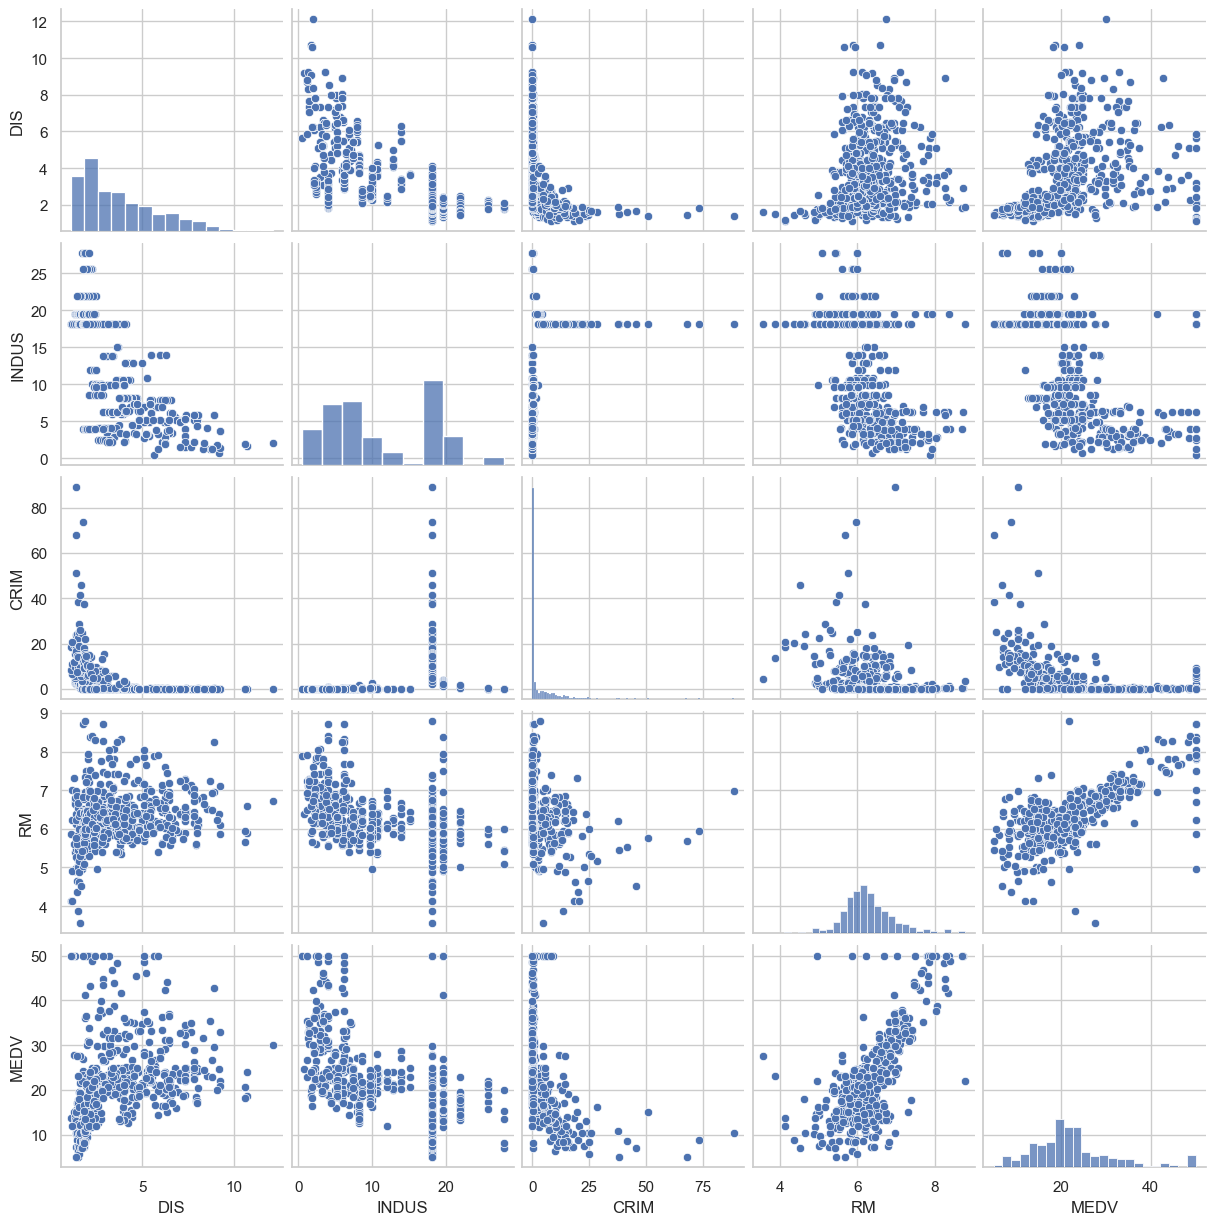

In [170]:
sns.pairplot(housing_df[cols], height=2.5)

<AxesSubplot: >

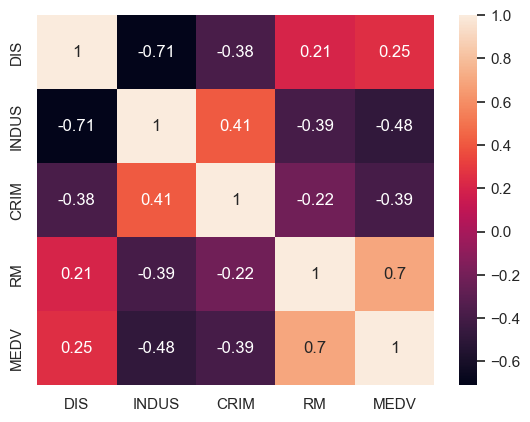

In [171]:
cm = np.corrcoef(housing_df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [172]:
# modelo con sk learn
X = housing_df["RM"].values.reshape(-1, 1)
Y = housing_df["MEDV"].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

# normalización de los datos
x_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(Y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

Text(0.5, 0, 'Promedio de habitaciones [RM]')

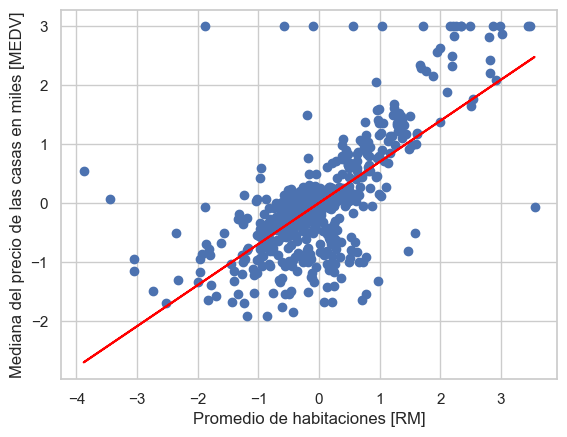

In [173]:
plt.scatter(x_std, y_std)
plt.plot(x_std, slr.predict(x_std), color="red")
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

In [174]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))

In [175]:
sc_y.inverse_transform(slr.predict(num_habitaciones_std))

array([[10.83992413]])

Resultados usando el tutorial de la página de sklearn (no realiza una normalización de los datos)

In [176]:
X = housing_df["RM"].values.reshape(-1, 1)
Y = housing_df["MEDV"].values.reshape(-1, 1)

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.48352545599133423

In [177]:
reg.coef_

array([[9.10210898]])

In [178]:
reg.intercept_

array([-34.67062078])

In [179]:
reg.predict(np.array([5]).reshape(-1, 1))

array([[10.83992413]])

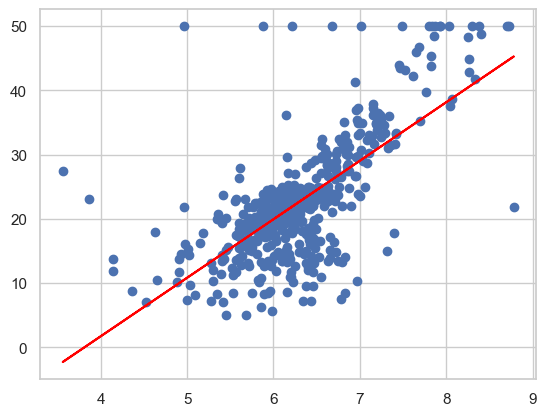

In [180]:
plt.scatter(X, Y)
plt.plot(X, reg.predict(X), color="red")

## Funcionamiento de la regresión lineal

Para un conjunto de puntos que presentan una tendencia lineal.

Los puntos $(x_{i}, y_{i})$ se ajustarán a una recta:

$$
y = w_{0} + w_{1}x
$$

Donde $w_{0}$ y $w_{1}$ son los pesos del modelo, se llaman intercepto y pendiente, respectivamente.

### Función de pérdida y optimización
1) ajuste del model
2) comparación valores reales con predicciones
3) ajuste de los pesos en el modelo
4) regreso al paso (1)

Función de pérdida (método de mínimos cuadrados)

Algoritmo de optimización (descenso de gradiente)


#### Métricas

MSE (Mean Square Error):

$$
    MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - \^y_{y} )^2
$$

Coeficiente de determinación:

$$
    R^2 = 1 - \frac{\sum_{i=1}^{N} (y_{i} - \^y_{y} )^2}{\sum_{i=1}^{N} (y_{i} - \^y_{y} )^2}
$$

## Regresión lineal multivariable

$$
\^y = w_{0} + w_{1}x_{1} + \cdots + w_{n}x_{n}
$$

In [269]:
X = housing_df[["RM", "INDUS"]].values
Y = housing_df["MEDV"].values.reshape(-1, 1)

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.536298400585631

In [270]:
reg.predict(np.array([[5,15]]))

array([[11.19125151]])

In [271]:
from mpl_toolkits.mplot3d import Axes3D

c:\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


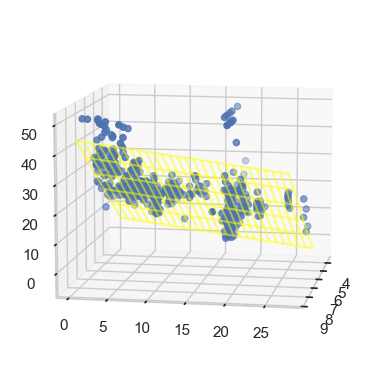

In [307]:
x1_range = np.arange(housing_df["RM"].min(), housing_df["RM"].max())
x2_range = np.arange(housing_df["INDUS"].min(), housing_df["INDUS"].max())

x1, x2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({
    "RM": x1.ravel(), 
    "INDUS": x2.ravel()
    })

# plano


pred = reg.predict(plano).reshape(x1.shape)
pred = reg.predict(plano).reshape(x2.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(housing_df["RM"], housing_df["INDUS"], housing_df["MEDV"])

ax.plot_wireframe(x1, x2, pred, alpha=0.5, color="yellow")
ax.view_init(elev=10, azim=10)

plt.show()

Otro ejercicio con los datos de [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [309]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df